# Lab 4.01 - Bivariate Analysis of Qualitative Data


In [1]:
# Importing the necessary packages
import numpy as np  # "Scientific computing"
import scipy.stats as stats  # Statistical tests

import pandas as pd  # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt  # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns  # Advanced data visualisation

C:\Users\nealj\AppData\Local\Temp\ipykernel_26008\48876594.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Data Frame


## Exercise 1 - soft-drinks

The file softdrinks.xlsx categorizes 250 randomly
selected consumers on the basis of their gender, their
age, and their preference for our brand or a competitor's brand of a low-calorie soft drink. Use a chi-square test for independence to see whether the drink
preference is independent of gender, and then whether
it is independent of age. First make a plot

Results of the main calculations:

- age vs preference
  - χ² ≈ 3.8589
  - p-value = 0.2771
  - We do not reject H0

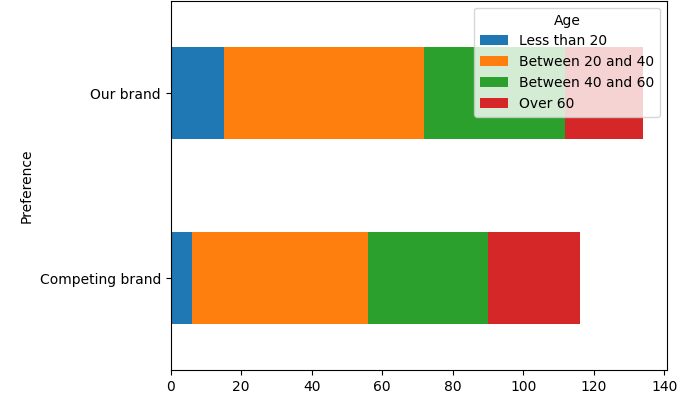

- gender vs preference
  - χ² ≈ 1.4078
  - p-value = 0.2354
  - We do not reject H0

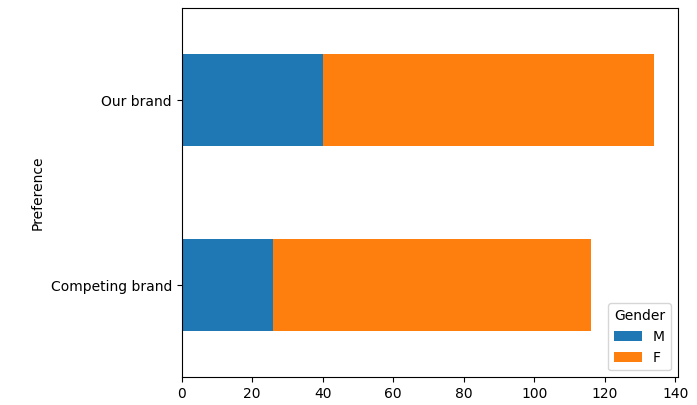


In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Softdrinks.csv",
    sep=";",
)


df.head()

,Consumer,Gender,Age,Preference
0,1,F,Over 60,Our brand
1,2,F,Between 40 and 60,Our brand
2,3,M,Between 40 and 60,Our brand
3,4,F,Over 60,Competing brand
4,5,M,Between 20 and 40,Our brand


### Age vs Brand


(<Figure size 640x480 with 3 Axes>,
 {('Over 60', 'Our brand'): (0.0,
   0.0,
   0.18916256157635467,
   0.4568106312292358),
  ('Over 60', 'Competing brand'): (0.0,
   0.46013289036544847,
   0.18916256157635467,
   0.5398671096345515),
  ('Between 40 and 60', 'Our brand'): (0.1940886699507389,
   0.0,
   0.29162561576354673,
   0.5387447247912364),
  ('Between 40 and 60', 'Competing brand'): (0.1940886699507389,
   0.542066983927449,
   0.29162561576354673,
   0.4579330160725509),
  ('Between 20 and 40', 'Our brand'): (0.4906403940886699,
   0.0,
   0.42167487684729066,
   0.5309404787779053),
  ('Between 20 and 40', 'Competing brand'): (0.4906403940886699,
   0.5342627379141179,
   0.42167487684729066,
   0.46573726208588195),
  ('Less than 20', 'Our brand'): (0.9172413793103448,
   0.0,
   0.08275862068965513,
   0.7119126720455624),
  ('Less than 20', 'Competing brand'): (0.9172413793103448,
   0.715234931181775,
   0.08275862068965513,
   0.28476506881822494)})

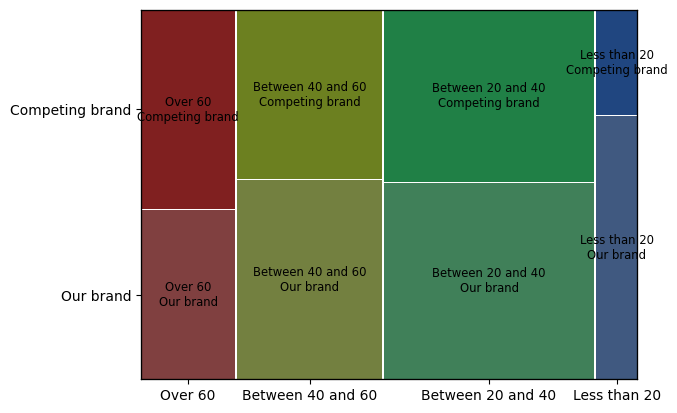

In [5]:
mosaic(data=df, index=["Age", "Preference"])

In [6]:
age_brand = pd.crosstab(df.Preference, df.Age)
# Cramér's V
stats.contingency.association(age_brand, method="cramer")

0.12424027040933154

In [7]:
# Chi-squared test for independence
chi2, p, dof, expected = stats.chi2_contingency(age_brand)
g = stats.chi2.isf(0.05, dof)
print("Degrees of freedom: %d" % dof)
print("Chi-squared       : %d" % chi2)
print("critical value g  : %d" % g)
print("P-value           : %d" % p)
print("Expected values   :")
expected

Degrees of freedom: 3
Chi-squared       : 3
critical value g  : 7
P-value           : 0
Expected values   :


array([[49.648, 34.336,  9.744, 22.272],
       [57.352, 39.664, 11.256, 25.728]])

In [ ]:
# Right tail probability in the chi-squared distribution

# x-values:
x = np.linspace(0, 15, num=200)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=4)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(0.05, df=4)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)  # probability density
tplot.fill_between(x, y, where=x >= q, color="lightblue")  # critical area
tplot.axvline(q)
# critical value

### Gender vs Brand
